<h1>Research question: How speaking rate of patients with aphasia (PWA) determine whether they belong to the fluent aphasia group or non-fluent aphasia group</h1>

<h2>Source of the dataset</h2>
<p>Data will be extracted from Aphasia Bank in which the number of Cantonese words used and time used during the story retell discourse will be extracted to create a new dataset. Only 1 story retell discourse will be used and will be of the same topic -- <b>"The Boy who cried wolf"</b>

The total amount of participants is 26 and 2 subgroups will be generated (fluent aphasia and non-fluent aphasia).
12 of the participants are fluent and 14 are non-fluent.</p>

<h2>Methodology</h2>
<h3>To calculate the number of Cantonese words, Cantonese words will be extracted from the transcript and put into a word counter for calculation:</h3>

<h4>counted:</h4>

- duplicated words
- words articulated wrongly but intelligible
- unintelligible words will be counted as one word

<h4>not counted:</h4>

- groping instances
- description of the manner of speech of the participant
<br>

<h4>Parameter:</h4>
- the number of Cantonese words used
- time used during the story retell discourse

<h3>Linear classification using SVM was used for analyzing the dataset</h3>

<h2>Limitations</h2>
<p> As linear classification using SVM was the model used for analyzing the dataset, some data has to be excluded from the dataset in order to make use of the model. A total of data of 3 participants was thus discarded. The 3 participants discarded were all of the fluent type.

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [7]:
fluent_or_not = pd.read_csv('/Users/lesleylee/Desktop/Year4/Postech/Program and files/Aphasia data science project - Sheet1 (3).csv')
fluent_or_not.head(100)

,Client no,Client Type,Words,Time (s),Topic,Type,Age,Years(edu),Gender
0,A002,Anomia,182,78,The Boy Who Cried Wolf,Fluent,NaN,NaN,NaN
1,A003,Anomia,194,71,The Boy Who Cried Wolf,Fluent,NaN,NaN,NaN
2,A004,Anomia,139,52,The Boy Who Cried Wolf,Fluent,NaN,NaN,NaN
3,A005,Anomia,88,51,The Boy Who Cried Wolf,Fluent,NaN,NaN,NaN
4,A006,TM,24,50,The Boy Who Cried Wolf,Non-fluent,NaN,NaN,NaN
5,A007,Anomia,194,93,The Boy Who Cried Wolf,Fluent,NaN,NaN,NaN
6,A008,TM,3,31,The Boy Who Cried Wolf,Non-fluent,NaN,NaN,NaN
7,A009,Anomia,324,261,The Boy Who Cried Wolf,Fluent,NaN,NaN,NaN
8,A010,Anomia,98,50,The Boy Who Cried Wolf,Fluent,NaN,NaN,NaN
9,A011,Anomia,145,70,The Boy Who Cried Wolf,Fluent,NaN,NaN,NaN


/Users/lesleylee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


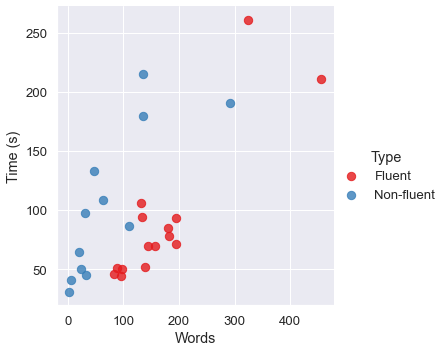

In [8]:
# Plot two ingredients
sns.lmplot('Words', 'Time (s)', data= fluent_or_not, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [9]:
#Data of three clients are dropped in order to construct a linear model
fluent_or_not = pd.read_csv('/Users/lesleylee/Desktop/Year4/Postech/Program and files/Aphasia data science project - Sheet1 (3).csv')
fluent_or_not = fluent_or_not.drop(7)
fluent_or_not = fluent_or_not.drop(12)
fluent_or_not = fluent_or_not.drop(14)
fluent_or_not.head(100)

,Client no,Client Type,Words,Time (s),Topic,Type,Age,Years(edu),Gender
0,A002,Anomia,182,78,The Boy Who Cried Wolf,Fluent,NaN,NaN,NaN
1,A003,Anomia,194,71,The Boy Who Cried Wolf,Fluent,NaN,NaN,NaN
2,A004,Anomia,139,52,The Boy Who Cried Wolf,Fluent,NaN,NaN,NaN
3,A005,Anomia,88,51,The Boy Who Cried Wolf,Fluent,NaN,NaN,NaN
4,A006,TM,24,50,The Boy Who Cried Wolf,Non-fluent,NaN,NaN,NaN
5,A007,Anomia,194,93,The Boy Who Cried Wolf,Fluent,NaN,NaN,NaN
6,A008,TM,3,31,The Boy Who Cried Wolf,Non-fluent,NaN,NaN,NaN
8,A010,Anomia,98,50,The Boy Who Cried Wolf,Fluent,NaN,NaN,NaN
9,A011,Anomia,145,70,The Boy Who Cried Wolf,Fluent,NaN,NaN,NaN
10,A012,Anomia,95,44,The Boy Who Cried Wolf,Fluent,NaN,NaN,NaN


/Users/lesleylee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


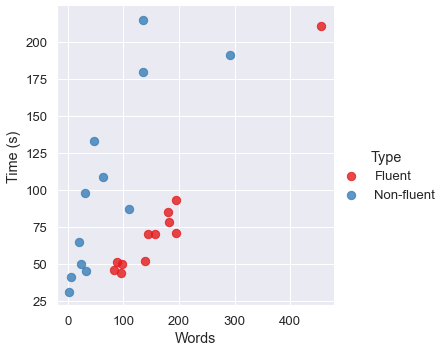

In [10]:
# Plot two ingredients
sns.lmplot('Words', 'Time (s)', data= fluent_or_not, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [11]:
speechrate = fluent_or_not[['Words','Time (s)']]#.as_matrix()
type_label = np.where(fluent_or_not['Type']=='Fluent', 0, 1)

In [12]:
model = svm.SVC(kernel='linear', C=1)
#model = svm.SVC(kernel='rbf', gamma = 0.1, C=1)

model.fit(speechrate, type_label)

SVC(C=1, kernel='linear')

In [13]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

/Users/lesleylee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 250.0, 0.0, 150.0)

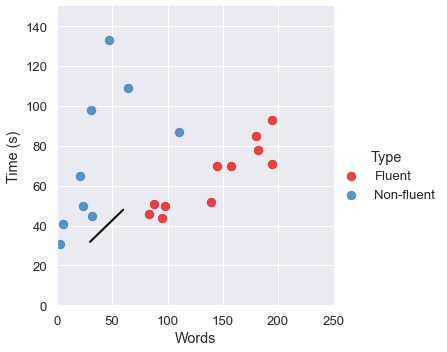

In [14]:
sns.lmplot('Words', 'Time (s)', data=fluent_or_not, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');
plt.axis((0, 250, 0, 150))

/Users/lesleylee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 250.0, 0.0, 150.0)

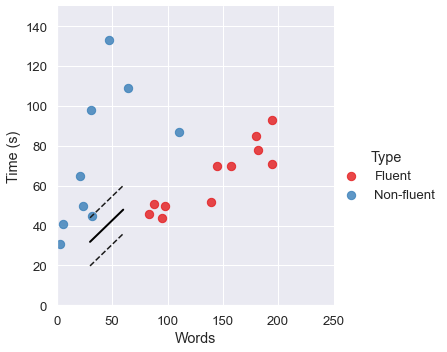

In [15]:
sns.lmplot('Words', 'Time (s)', data=fluent_or_not, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');
plt.axis((0, 250, 0, 150))

In [16]:
def fluent_or_nonfluent(Words, Time):
    if(model.predict([[Words, Time]]))==0:
        print('The client has fluent aphasia!')
    else:
        print('The client has non-fluent aphasia!!')

In [17]:
fluent_or_nonfluent(40,30)
fluent_or_nonfluent(500,400)

The client has fluent aphasia!
The client has non-fluent aphasia!!


/Users/lesleylee/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/lesleylee/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<h2>Result</h2>
<p>Linear classification using SVM was used to predict whether the client has fluent or non-fluent aphasia. As there were a few outliers for client with fluent aphasia, there were excluded from the dataset earlier. Totalling, 9 fluent and 14 non-fluent patients with aphasia</p>

<p>This model was used to predict whether the patient had fluent or non-fluent aphasia. From the data, the optimal hyperplane was being generated and planes parallel to the hyperplane was calculated using: $w*x_{i}
+b = +1$ and $w*x_{i} +b = –1$. The graph was plotted above. In the end, a function was generated based on the support vector to predict whether the client has fluent aphasia by inputting the words he spoke in a certain period of time.</p>

<h2>Discussion</h2>
<p> To further investigate the problem, other models like SVM using non-linear kernel can be used such that data that are outliers can be analyzed as well. L
    
For this project, some patient with fluent aphasia, 3 of them, are found to have similiar results as non-fluent aphasia as well, making them as false positives. There may be reasons causing this result. For example, the interviewer has also talked in the video, causing the participant to talk less, which leads to fewer words in the time duration of the discourse. The data cleaning process may also need to take into account of more factors when time is allowed in future project if this is conducted again </p>


